In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

##### No null values in the data

## UNIVARIATE ANALYSIS

In [7]:
df["User_ID"].nunique()

5891

#####  a total of 5871 Individuals are there in the data

In [8]:
df["Product_ID"].nunique()

3631

##### a total of 3631 products are there in the data

In [9]:
df_temp = df.groupby(["Age"]).agg({"User_ID":"nunique"}).reset_index()

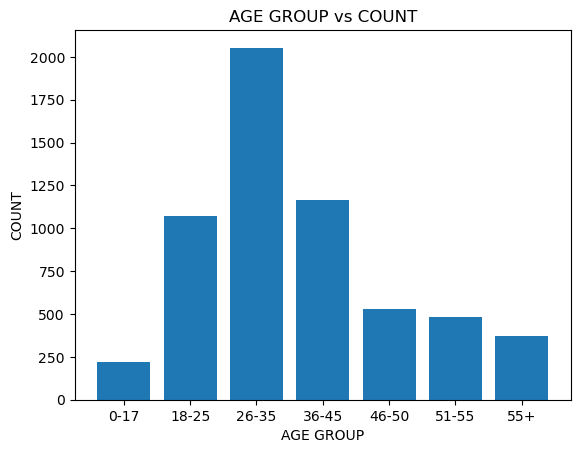

In [10]:
plt.bar(df_temp["Age"], df_temp["User_ID"], )
plt.xlabel("AGE GROUP")
plt.ylabel("COUNT")
plt.title("AGE GROUP vs COUNT")
plt.show()

##### Highest is 26-35 age group and most of data is 18-45

In [11]:
df_temp = df.groupby(["Gender"]).agg({"User_ID":"nunique"}).reset_index()

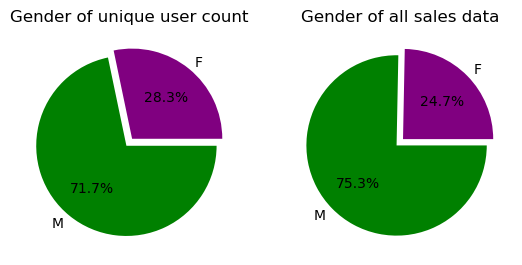

In [12]:
plt.subplot(1,2,1)
plt.pie(df_temp["User_ID"],explode=(0.05,0.05), labels=df_temp["Gender"],colors=['purple','green'],autopct='%.1f%%')
plt.title("Gender of unique user count")
plt.subplot(1,2,2)
arr = df["Gender"].value_counts()[::-1]
plt.pie(arr.values,explode=(0.05,0.05), labels=arr.index,colors=['purple','green'],autopct='%.1f%%')
plt.title("Gender of all sales data")
plt.show()

##### 71% of males are accountable for 75% purchases
    => 75 % of sales are from gender males

In [13]:
df_temp = df.groupby(["Occupation"]).agg({"User_ID":"nunique"}).reset_index()

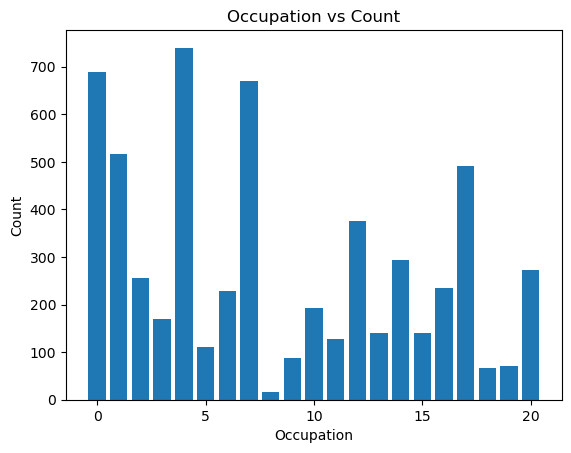

In [14]:
plt.bar(df_temp["Occupation"], df_temp["User_ID"], )
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Occupation vs Count")
plt.show()

In [15]:
df_temp = df.groupby(["City_Category"]).agg({"User_ID":"nunique"}).reset_index()
df_temp1 = df["City_Category"].value_counts().reset_index()

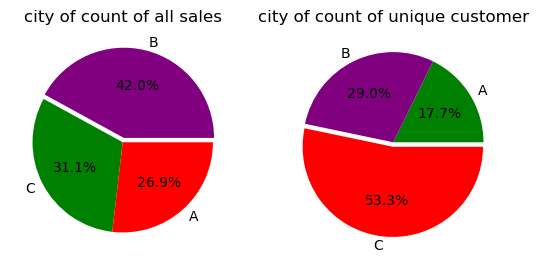

In [16]:
plt.subplot(1,2,1)
plt.pie(df_temp1["City_Category"],explode=(0.05,0,0), labels=df_temp1["index"],colors=['purple','green',"red"],autopct='%.1f%%')
plt.title("city of count of all sales")
plt.subplot(1,2,2)
plt.pie(df_temp["User_ID"],explode=(0,0,0.05), labels=df_temp["City_Category"],colors=['green','purple',"red"],autopct='%.1f%%')
plt.title("city of count of unique customer")
plt.show()

##### Most users from city category C but more sales are comming from city B

In [17]:
df_temp = df.groupby(["Stay_In_Current_City_Years"]).agg({"User_ID":"nunique"}).reset_index()
arr = df["Stay_In_Current_City_Years"].value_counts()

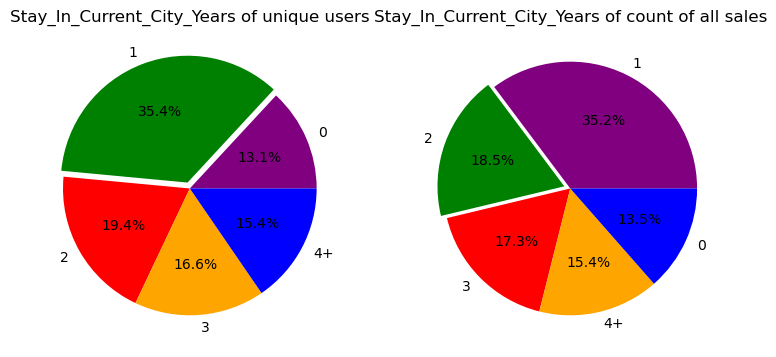

In [18]:
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.pie(df_temp["User_ID"],explode=(0,0.05,0,0,0), labels=df_temp["Stay_In_Current_City_Years"],colors=['purple','green',"red","Orange","blue"],autopct='%.1f%%')
plt.title("Stay_In_Current_City_Years of unique users")
arr = df["Stay_In_Current_City_Years"].value_counts()
plt.subplot(1,2,2)
plt.pie(arr.values,explode=(0,0.05,0,0,0), labels=arr.index,colors=['purple','green',"red","Orange","blue"],autopct='%.1f%%')
plt.title("Stay_In_Current_City_Years of count of all sales")
plt.show()

##### highest is 1 year

In [19]:
df_temp = df.groupby(["Marital_Status"]).agg({"User_ID":"nunique"}).reset_index()
arr = df["Marital_Status"].value_counts()

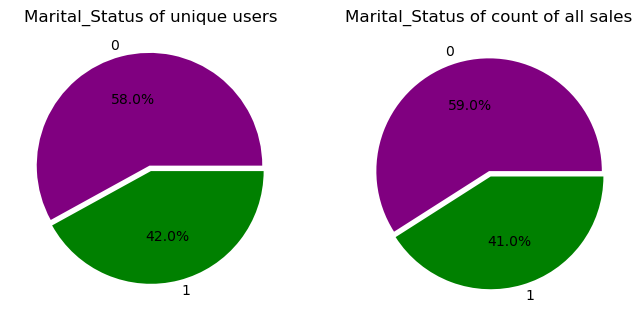

In [20]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.pie(df_temp["User_ID"],explode=(0.05,0), labels=df_temp["Marital_Status"],colors=['purple','green'],autopct='%.1f%%')
plt.title("Marital_Status of unique users")
plt.subplot(1,2,2)
plt.pie(arr.values,explode=(0,0.05), labels=arr.index,colors=['purple','green'],autopct='%.1f%%')
plt.title("Marital_Status of count of all sales")
plt.show()

##### Most are unmarried

In [21]:
df_temp = df.groupby(["Product_Category"]).agg({"Product_ID":"nunique"}).reset_index()

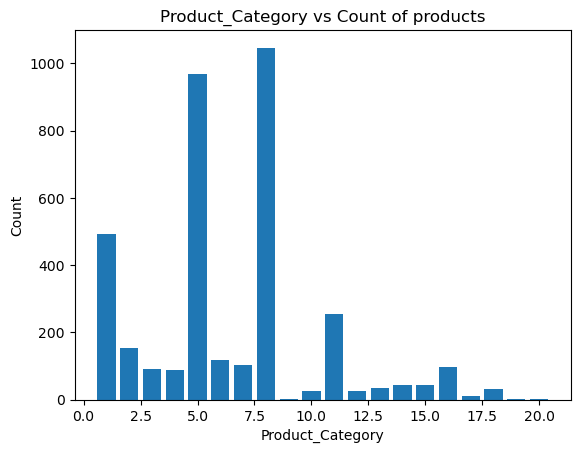

In [22]:
plt.bar(df_temp["Product_Category"], df_temp["Product_ID"], )
plt.xlabel("Product_Category")
plt.ylabel("Count")
plt.title("Product_Category vs Count of products")
plt.show()

##### most products lie under category 8,5 and 1

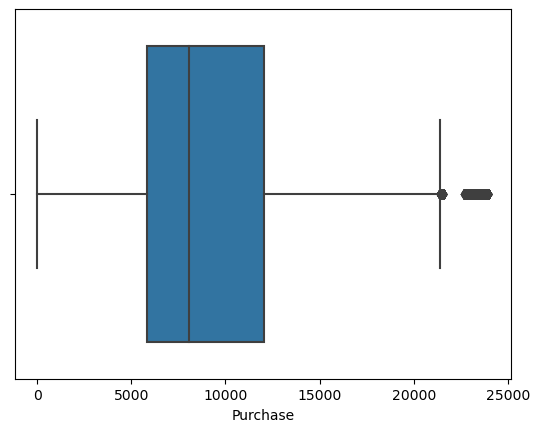

In [23]:
sns.boxplot(data = df, x="Purchase")
plt.show()

##### 75% purchase amount lie between 6000 - 12500

In [24]:
df[df["Purchase"] > 21300].shape[0]

2854

##### less outlier so we can ignore

## BIVARIATE ANALYSIS

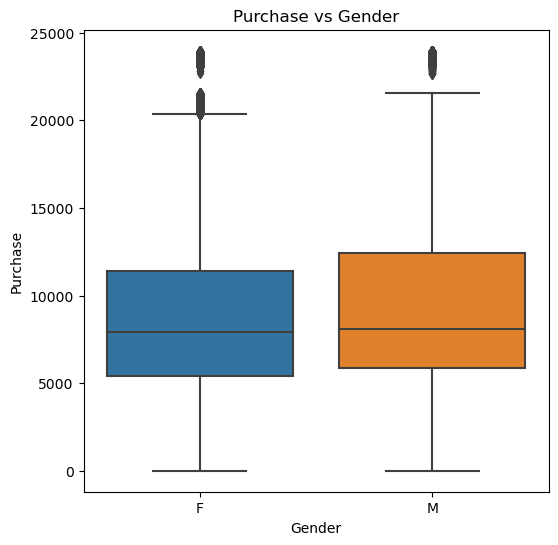

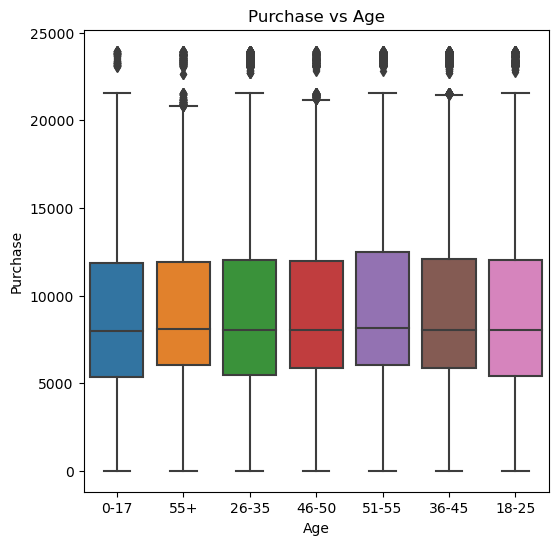

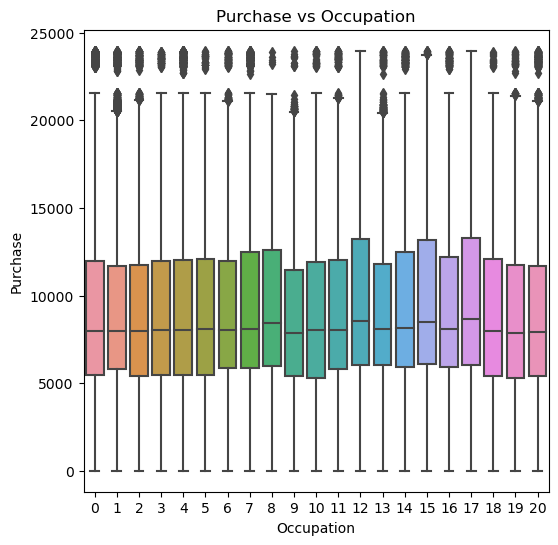

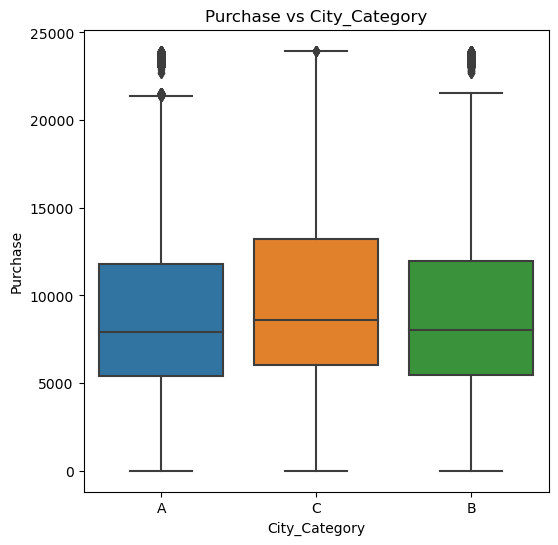

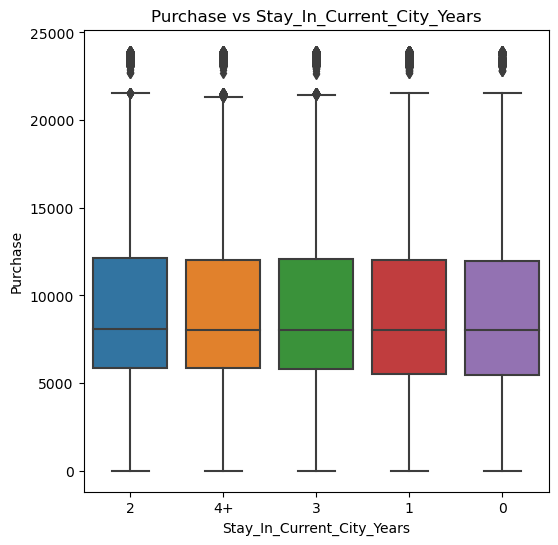

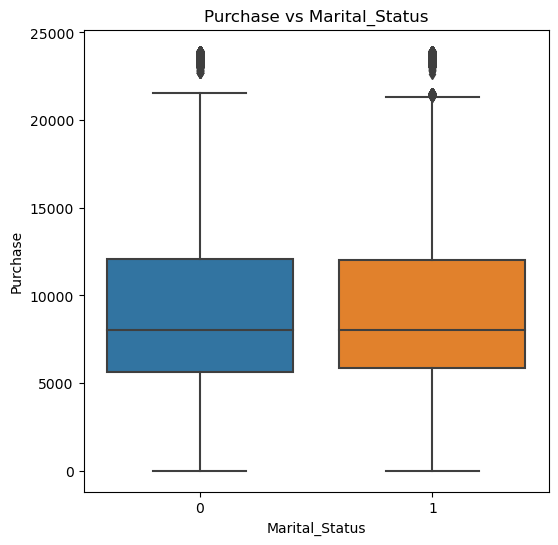

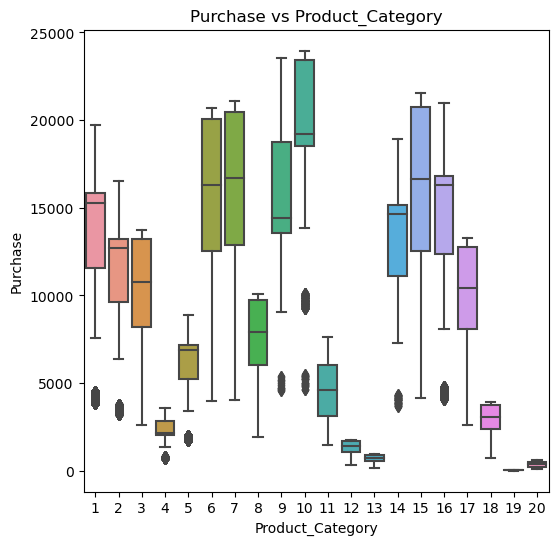

In [25]:
cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

count = 0
for i in range(0, 7):
    plt.figure(figsize=(6,6))
    sns.boxplot(data=df, y='Purchase', x=cols[i])
    plt.title("Purchase vs "+ cols[i])
    plt.show()


##### No major inferences from this

<AxesSubplot:xlabel='City_Category', ylabel='count'>

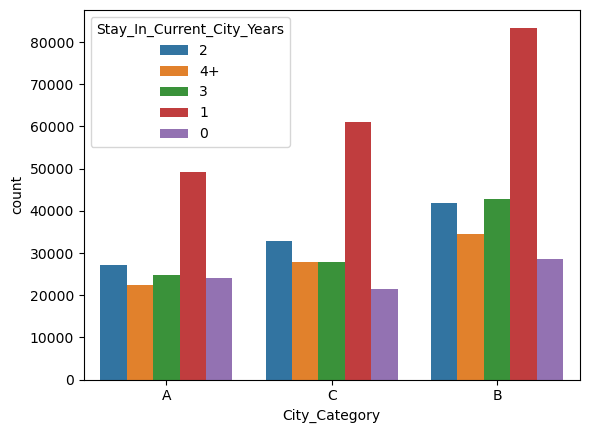

In [26]:
sns.countplot(data = df, x = "City_Category", hue = "Stay_In_Current_City_Years")

In [27]:
df_unique_user = df.drop_duplicates(subset="User_ID",keep="first")
df_unique_user.shape[0]

5891

<AxesSubplot:xlabel='City_Category', ylabel='count'>

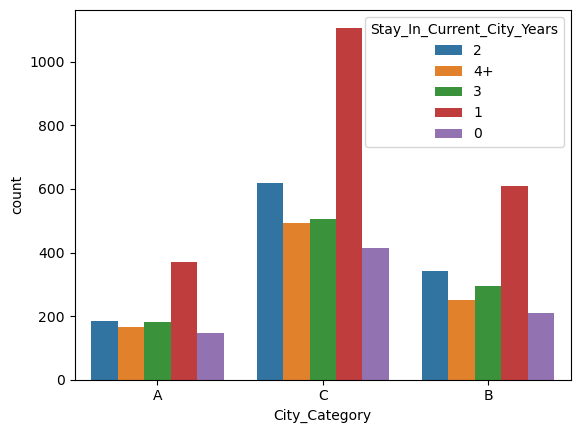

In [28]:
sns.countplot(data = df_unique_user, x = "City_Category", hue = "Stay_In_Current_City_Years")

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

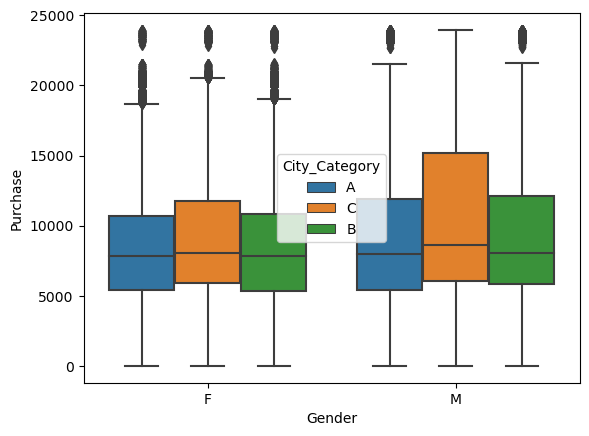

In [29]:
sns.boxplot(data = df, x= "Gender", hue = "City_Category", y= "Purchase")

## MULTIVARIATE ANALYSIS

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

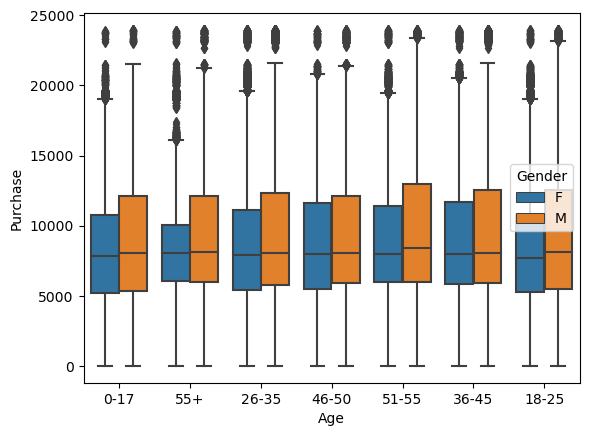

In [30]:
sns.boxplot(data = df, x = "Age", hue = "Gender", y = "Purchase")

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

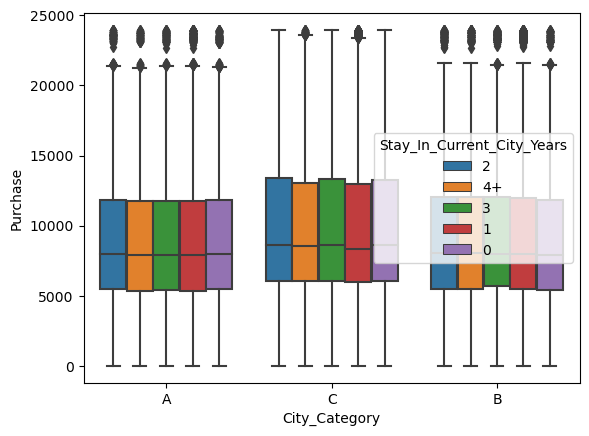

In [31]:
sns.boxplot(data = df, x = "City_Category", hue = "Stay_In_Current_City_Years", y = "Purchase")

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

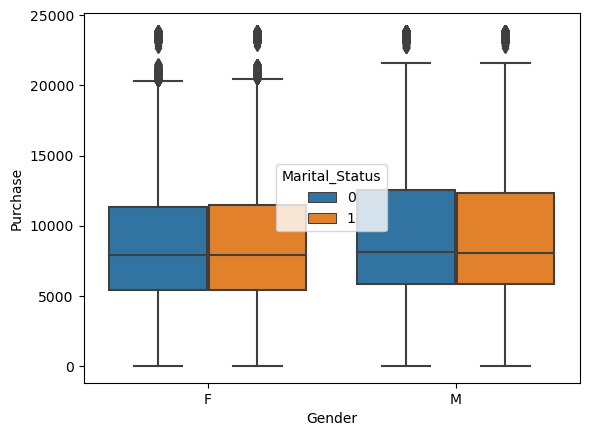

In [32]:
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status')

##### No much inferrences from bivariate and multivariate analysis
    => almost all categories have median around 7,500 to 8,500

In [33]:
df_total_purchases = df.groupby(['User_ID'])[['Purchase']].sum().reset_index()
df_total_purchases.rename(columns={"Purchase":"Total"}, inplace = True)

In [34]:
df_unique_user.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [35]:
df_uutp = df_unique_user.merge(df_total_purchases, on = "User_ID")

In [36]:
df_uutp.drop(columns = ["Purchase","Product_ID"], inplace = True)

In [37]:
df_uutp.head(3)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Total
0,1000001,F,0-17,10,A,2,0,3,334093
1,1000002,M,55+,16,C,4+,0,8,810472
2,1000003,M,26-35,15,A,3,0,1,341635


In [38]:
male_avg = df_uutp[df_uutp['Gender']=='M']['Total'].mean()
female_avg = df_uutp[df_uutp['Gender']=='F']['Total'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


##### Average amount spent by males is more compared to females

### CLT w.r.t gender on total bill

In [39]:
male_df = df_uutp[df_uutp['Gender']=='M']
female_df = df_uutp[df_uutp['Gender']=='F']

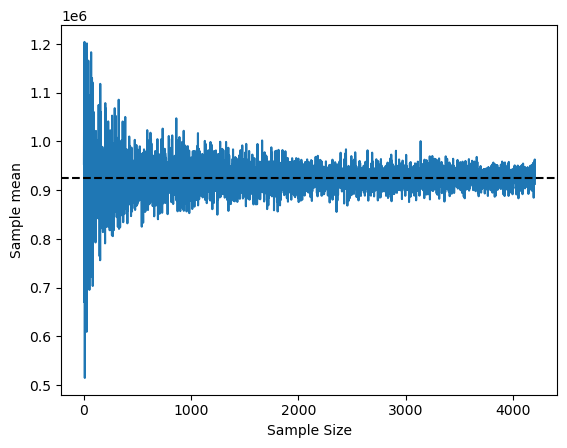

In [40]:
sample_means = []
for i in range(20,male_df.shape[0]):
    sample_mean = male_df.sample(i, replace = True)["Total"].mean()
    sample_means.append(sample_mean)

plt.plot(sample_means)
plt.xlabel("Sample Size")
plt.ylabel("Sample mean")
plt.axhline(y = male_avg, linestyle = '--', color = 'black')
    

##### For sample size 3000 we are seeing less deviations for males

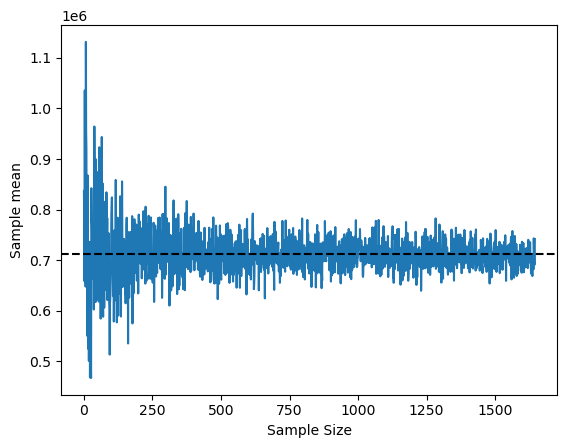

In [41]:
sample_means = []
for i in range(20,female_df.shape[0]):
    sample_mean = female_df.sample(i, replace = True)["Total"].mean()
    sample_means.append(sample_mean)

plt.plot(sample_means)
plt.xlabel("Sample Size")
plt.ylabel("Sample mean")
plt.axhline(y = female_avg, linestyle = '--', color = 'black')

##### For sample size 1000 we are seeing less deviation for females

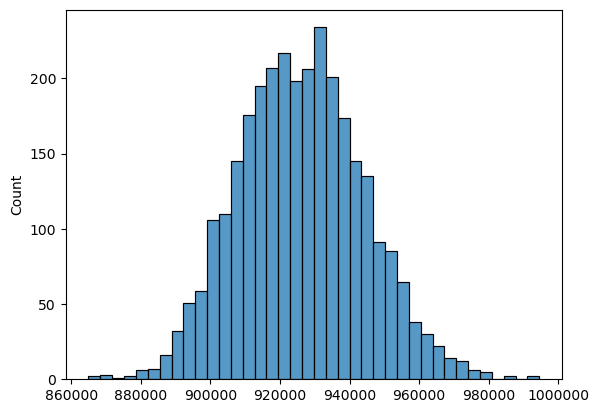

In [42]:
sample_size = 3000

male_sample_means = []

for person in range(3000):
    sample_mean = male_df.sample(sample_size, replace = True)["Total"].mean()
    male_sample_means.append(sample_mean)
    
sns.histplot(male_sample_means)
plt.ticklabel_format(style='plain', axis='x')

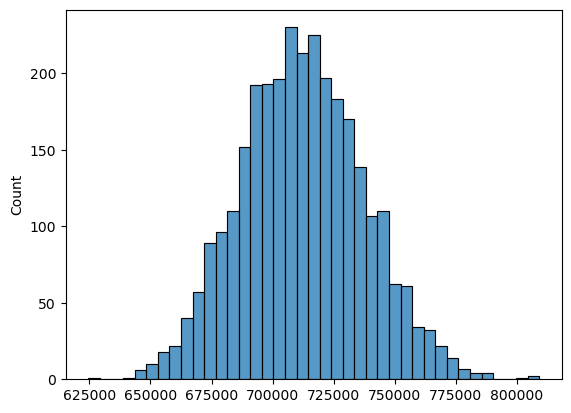

In [43]:
sample_size = 1000

female_sample_means = []

for person in range(3000):
    sample_mean = female_df.sample(sample_size, replace = True)["Total"].mean()
    female_sample_means.append(sample_mean)
    
sns.histplot(female_sample_means)
plt.ticklabel_format(style='plain', axis='x')

In [44]:
print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(np.mean(male_sample_means), np.std(male_sample_means)))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(np.mean(female_sample_means), np.std(female_sample_means)))


Male - Sample mean: 926041.92 Sample std: 17997.58
Female - Sample mean: 712232.61 Sample std: 25251.24


In [45]:
male_99 = np.percentile(male_sample_means, [0.5,99.5])
print("Population mean of males lies in ", round(male_99[0],2)," - ", round(male_99[1],2), " with 99% confidence")
female_99 = np.percentile(female_sample_means, [0.5,99.5])
print("Population mean of females lies in ", round(female_99[0],2)," - ", round(female_99[1],2), " with 99% confidence")
male_95 = np.percentile(male_sample_means, [2.5,97.5])
print("Population mean of males lies lies in ", round(male_95[0],2)," - ", round(male_95[1],2), " with 95% confidence")
female_95 = np.percentile(female_sample_means, [2.5,97.5])
print("Population mean  of females lies lies in ", round(female_95[0],2)," - ", round(female_95[1],2), " with 95% confidence")
male_90 = np.percentile(male_sample_means, [5,95])
print("Population mean of males lies lies in ", round(male_90[0],2)," - ", round(male_90[1],2), " with 90% confidence")
female_90 = np.percentile(female_sample_means, [5,95])
print("Population mean of females lies lies in ", round(female_90[0],2)," - ", round(female_90[1],2), " with 90% confidence")

Population mean of males lies in  882356.44  -  973652.3  with 99% confidence
Population mean of females lies in  650904.74  -  777273.0  with 99% confidence
Population mean of males lies lies in  892386.2  -  962213.79  with 95% confidence
Population mean  of females lies lies in  664992.87  -  763383.76  with 95% confidence
Population mean of males lies lies in  897777.37  -  955994.38  with 90% confidence
Population mean of females lies lies in  671423.29  -  754513.29  with 90% confidence


##### with 99% confidence
    => males average lies in  880600.32  -  971329.24
    => females average lies in  647812.45  -  780156.08

### CLT w.r.t Marital_Status on total bill

In [46]:
unmarried_df = df_uutp[df_uutp["Marital_Status"] == 0]
married_df = df_uutp[df_uutp["Marital_Status"] == 1]

Text(0, 0.5, 'Sample mean')

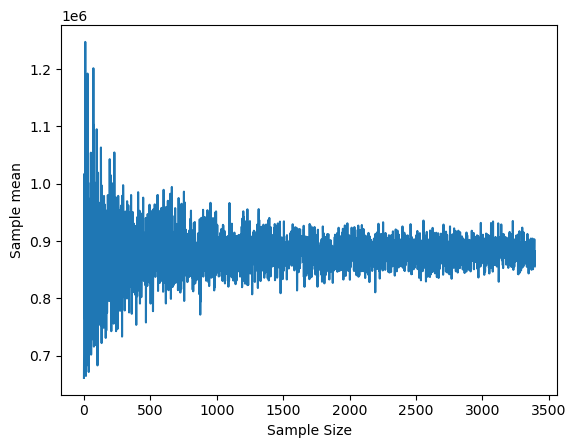

In [47]:
sample_means = []
for i in range(20,unmarried_df.shape[0]):
    sample_mean = unmarried_df.sample(i, replace = True)["Total"].mean()
    sample_means.append(sample_mean)

plt.plot(sample_means)
plt.xlabel("Sample Size")
plt.ylabel("Sample mean")

Text(0, 0.5, 'Sample mean')

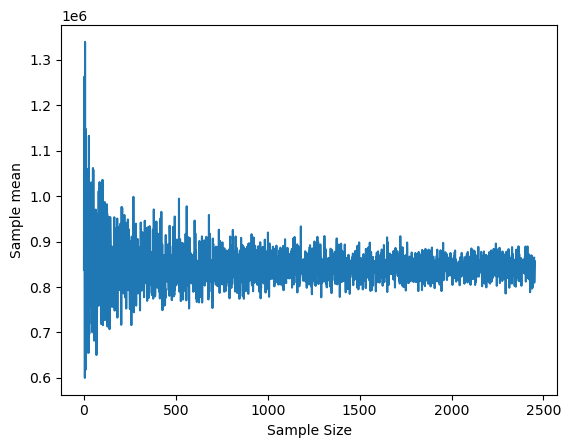

In [48]:
sample_means = []
for i in range(20,married_df.shape[0]):
    sample_mean = married_df.sample(i, replace = True)["Total"].mean()
    sample_means.append(sample_mean)

plt.plot(sample_means)
plt.xlabel("Sample Size")
plt.ylabel("Sample mean")

In [49]:
sample_size_unmarried = 2500
sample_size_married = 1250

unmarried_sample_means = []
married_sample_means = []

for person in range(3000):
    sample_mean = unmarried_df.sample(sample_size_unmarried, replace = True)["Total"].mean()
    unmarried_sample_means.append(sample_mean)
    sample_mean = married_df.sample(sample_size_married, replace = True)["Total"].mean()
    married_sample_means.append(sample_mean)
    

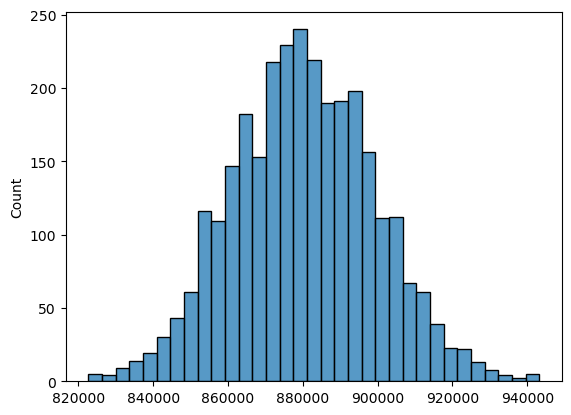

In [50]:
sns.histplot(unmarried_sample_means)
plt.ticklabel_format(style='plain', axis='x')

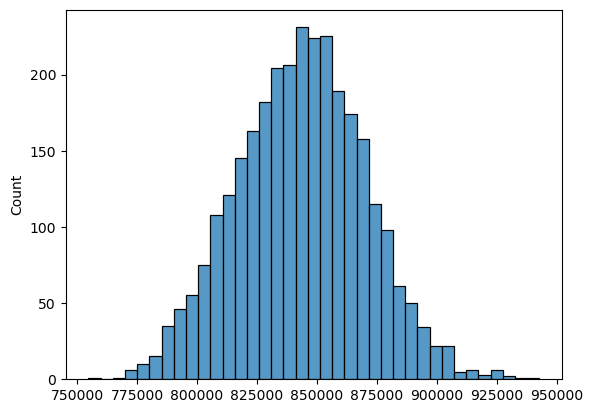

In [51]:
sns.histplot(married_sample_means)
plt.ticklabel_format(style='plain', axis='x')

In [52]:
unmarried_99 = np.percentile(unmarried_sample_means, [0.5,99.5])
print("Population mean of unmarried lies in ", round(unmarried_99[0],2)," - ", round(unmarried_99[1],2), " with 99% confidence")
married_99 = np.percentile(married_sample_means, [0.5,99.5])
print("Population mean of married lies in ", round(married_99[0],2)," - ", round(married_99[1],2), " with 99% confidence")
unmarried_95 = np.percentile(unmarried_sample_means, [2.5,97.5])
print("Population mean of unmarried lies lies in ", round(unmarried_95[0],2)," - ", round(unmarried_95[1],2), " with 95% confidence")
married_95 = np.percentile(married_sample_means, [2.5,97.5])
print("Population mean  of married lies lies in ", round(married_95[0],2)," - ", round(married_95[1],2), " with 95% confidence")
unmarried_90 = np.percentile(unmarried_sample_means, [5,95])
print("Population mean of unmarried lies lies in ", round(unmarried_90[0],2)," - ", round(unmarried_90[1],2), " with 90% confidence")
married_90 = np.percentile(married_sample_means, [5,95])
print("Population mean of married lies lies in ", round(married_90[0],2)," - ", round(married_90[1],2), " with 90% confidence")

Population mean of unmarried lies in  832923.01  -  931194.11  with 99% confidence
Population mean of married lies in  778529.74  -  913439.75  with 99% confidence
Population mean of unmarried lies lies in  844198.79  -  917876.97  with 95% confidence
Population mean  of married lies lies in  790791.03  -  895752.71  with 95% confidence
Population mean of unmarried lies lies in  849471.4  -  911845.92  with 90% confidence
Population mean of married lies lies in  798984.06  -  887009.6  with 90% confidence


##### with 99% confidence
    => unmarried average lies in  835016.45  -  930098.39
    => married average lies in  778466.89  -  915494.51

### CLT w.r.t Age on total bill

In [53]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['0-17','18-25', '26-35', '36-45', '46-50', '51-55', '55+']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = df_uutp[df_uutp['Age']==age_interval].sample(sample_size, replace=True)['Total'].mean()
        all_means[age_interval].append(mean)

In [54]:
for i in age_intervals:
    val = np.percentile(all_means[i], [0.5,99.5])
    print("Population mean of age group ", i ," lies in ", round(val[0],2)," - ", round(val[1],2), " with 99% confidence")

Population mean of age group  0-17  lies in  508024.84  -  759538.67  with 99% confidence
Population mean of age group  18-25  lies in  692948.31  -  1014311.39  with 99% confidence
Population mean of age group  26-35  lies in  824554.0  -  1192243.67  with 99% confidence
Population mean of age group  36-45  lies in  707749.02  -  1080519.27  with 99% confidence
Population mean of age group  46-50  lies in  632507.16  -  965430.36  with 99% confidence
Population mean of age group  51-55  lies in  624783.99  -  906577.67  with 99% confidence
Population mean of age group  55+  lies in  441859.96  -  659450.09  with 99% confidence


##### with 99% confidence
    => age group 18-25 average lies in  709029.54 -1007436.32
    => age group 26-35 average lies in  798683.11 -1192732.2

####

## Recommendations
    => Men spent more money than women, So company should focus on increasing female customers by advertising female centric products
    => Product_Category - 1, 5, 8 have highest purchasing. so you can give discounts on other categories
    => Unmarried customers spend more money than married customers. so try to introduce family card with discounts
    => Most users from city category C but more sales are comming from city B, so you have users, but inorder to generate more sales give discounts on higher purchases bills like discounts if bill crosses certain amount and also follw the best practices that were followed in city category b like more stores or etc.
